## Times Analysis

In this notebook we will elaborate and confront the times data obtained from testing our custom algorithm for the broadcast with the original algorithm used by OpenMPI. This data are obtained to confront the weak scalability of the two algorithms for a number of processes that goes from 4 to 32. Therefore we have fixed the amount of integers to pass for each process of the problem: we will pass between the processes an array of size processes$\times$4. We will consider the times also for the processes on the same node or split between two nodes. 

N.B. Due to some problems during the production this data, differently from the one of the Strong Scalability, are made on THIN nodes instead of EYPC.

In [1]:
#We will use Numpy to handle the arrays of data, pandas to extract the data from the files and matplotlib to plot the results.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#First I've already set the name. If you exec this notebook in the repo this should work.
customs_names = [ #File names of the times for the custom algorithm
    "samenode_times/bcustom_times_4.txt",
    "samenode_times/bcustom_times_8.txt",
    "samenode_times/bcustom_times_16.txt",
    "samenode_times/bcustom_times_32.txt",
]

native_names = [ #File names of the times for the original algorithm
    "samenode_times/bnative_times_4.txt",
    "samenode_times/bnative_times_8.txt",
    "samenode_times/bnative_times_16.txt",
    "samenode_times/bnative_times_32.txt",
]

We have for each file a total of 200 tests so we want to find the mean computational time and the std for each one of the files. Let's start with the ones of the custom algorithm

In [3]:
custom_stats = np.zeros((len(customs_names),2),dtype=float) #array for the means and stds of each file

for i in range(len(custom_stats)):
    #Import the associated data and compute
    file = pd.read_table(customs_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    custom_stats[i,0]=np.mean(file)
    custom_stats[i,1]=np.std(file)

In [4]:
print(custom_stats)

[[4.33800000e-03 8.12909950e-03]
 [1.63400250e-02 2.30495667e-02]
 [9.16280000e-04 3.26871988e-03]
 [1.83015000e-04 5.29841936e-05]]


We can observe already from this that we have a spike for 8 processes in both cases. Let's do the same for the original algorithm

In [5]:
native_stats = np.zeros((len(native_names),2),dtype=float)

for i in range(len(native_stats)):
    file = pd.read_table(native_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    native_stats[i,0]=np.mean(file)
    native_stats[i,1]=np.std(file)

In [6]:
print(native_stats)

[[5.90177500e-03 1.08533209e-02]
 [4.06446000e-03 1.00444238e-02]
 [2.68495000e-04 1.13160138e-03]
 [2.03655000e-04 8.35755106e-05]]


Looking to the mean we can already observe that the mean value is lower than the mean value for the custom algorithm but comparable. We can however observe that for the native the values are strictly decreasing. The std seems comparable

In [7]:
#Prepare the "x" for the plot a.k.a. the number of cores
cores = np.array([4,8,16,32],dtype=int)
print(cores)

[ 4  8 16 32]


<ErrorbarContainer object of 3 artists>

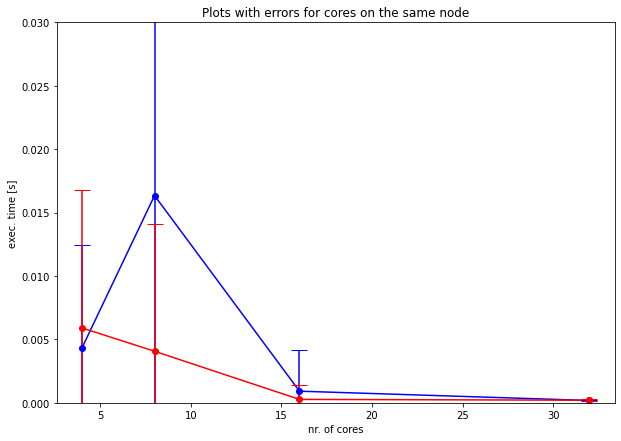

In [8]:
#And now let's plot
plt.figure(figsize=(10,7))
plt.title("Plots with errors for cores on the same node")
plt.xlabel("nr. of cores")
plt.ylabel("exec. time [s]")
plt.plot(cores,custom_stats[:,0],color='b')
plt.plot(cores,native_stats[:,0],color='r')
plt.ylim(0,0.03)
plt.errorbar(cores,custom_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(cores,native_stats[:,0],yerr=native_stats[:,1],fmt='o',color='red',capsize=8)

As we can observe for 4 cores and for a lot of cores the two computational times are almost the same and also the std is comparable. However for 8 cores the custom algorithms seems to perform worst. Especially for this situation, it is important to consider the fluctuations in fact, as we can observe, the variability of the execution time is quite strong in both of the algorithms and we have always an importartant superposition of the two intervals. In all the cases we have also that the mean point of the other algorithm stay inside the interval associated to the other one. This flucutuations can tell us that the situation of 8th core can be a simple unfortunate case and the two values could be nearer than in this situation.

In any way, this plots tells us that the weak scalability for both the plot is quite good.

### DIFFERENT NODES TIMES

Now let's do the exact same thing when the cores are split between two different nodes. The process is almost the same so I will not put comment inside the code.

In [9]:
customs_names = [
    "diffnode_times/bcustom_times_4.txt",
    "diffnode_times/bcustom_times_8.txt",
    "diffnode_times/bcustom_times_16.txt",
    "diffnode_times/bcustom_times_32.txt",
]

native_names = [
    "diffnode_times/bnative_times_4.txt",
    "diffnode_times/bnative_times_8.txt",
    "diffnode_times/bnative_times_16.txt",
    "diffnode_times/bnative_times_32.txt",
]

In [10]:
custom_stats = np.zeros((len(customs_names),2),dtype=float)

for i in range(len(custom_stats)):
    file = pd.read_table(customs_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    custom_stats[i,0]=np.mean(file)
    custom_stats[i,1]=np.std(file)

In [11]:
print(custom_stats)

[[0.00828332 0.00520367]
 [0.01410001 0.00944514]
 [0.054165   0.04154608]
 [0.00717956 0.00391684]]


As we can observe the mean values are far greater than before!

In [12]:
native_stats = np.zeros((len(native_names),2),dtype=float)

for i in range(len(native_stats)):
    file = pd.read_table(native_names[i],delimiter=" ",header=None)
    file = file.to_numpy()[:,0]
    
    native_stats[i,0]=np.mean(file)
    native_stats[i,1]=np.std(file)

In [13]:
print(native_stats)

[[0.01077521 0.0246102 ]
 [0.0139191  0.02120689]
 [0.05386739 0.06703036]
 [0.01444583 0.00932859]]


A similar behaviour can be observed here

In [14]:
cores = np.array([4,8,16,32],dtype=int)
print(cores)

[ 4  8 16 32]


<ErrorbarContainer object of 3 artists>

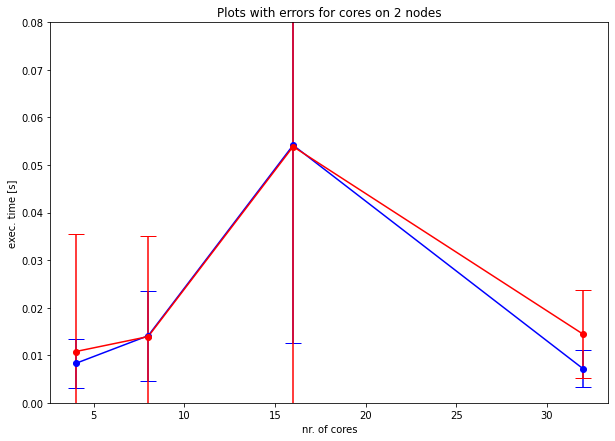

In [15]:
plt.figure(figsize=(10,7))
plt.title("Plots with errors for cores on 2 nodes")
plt.xlabel("nr. of cores")
plt.ylabel("exec. time [s]")
plt.plot(cores,custom_stats[:,0],color='b')
plt.plot(cores,native_stats[:,0],color='r')
plt.ylim(0,0.08)
plt.errorbar(cores,custom_stats[:,0],yerr=custom_stats[:,1],fmt='o',color='blue',capsize=8)
plt.errorbar(cores,native_stats[:,0],yerr=native_stats[:,1],fmt='o',color='red',capsize=8)

Looking to this plot, we can observe that the behaviours of both the algorithms are far different. Both the original algorithm and the custom now present a growing trend for the computation time for a growing number of cores. The distances between the two are very narrow and the intervals present an almost complete superposition. The last point for both of the algorithms presents a strange behaviour. As we can see the computation time drops to lower value especially for the original algorithm. We can try to formulate some possible explantions:

- The first explanation, probably too simple, is that we have produce an insanely particular set of tests that give us as image an unrealistic behaviour. In other words, considering a bigger number of tests this anomaly should disappear.
- A second explanation can be formulated looking especially to the original broadcast regime. Before trying to explain this event I would like to bring to the attention the fact that I don't know how the different cores are assigned to the IDs and if there is some kind of priorities but I we can imagine for a second that all the ID are assigned first on the cores in a node A and then to the cores in the node B and not in a casual order. If this situation occure we will have at first a message passing between the cores on node A and then we will have the message passing between some "link" cores from A to B. If the mass of the core in each node is sufficiently high the contribution given from the message passing from node A to B will become less and less relevant in comparison with the execution time part given by the "volume" cores of each node. Now if is present some kind of priority in the ID assignation or, in some way, is not completly and authentically casual, this observation can be in some degree generalized explaining in such way the result.